In [2]:
import gym
import matplotlib.pyplot as plt
from stable_baselines3 import PPO
from stable_baselines3.common.evaluation import evaluate_policy
from stable_baselines3.common.callbacks import CheckpointCallback

In [3]:
%load_ext autoreload
%autoreload 2

%matplotlib inline

# Choose Environment

Any available selection according to the default Gym environments. For example, [classic controls](https://gymnasium.farama.org/environments/classic_control/)

In [9]:
# Create the environment
env = gym.make("CartPole-v1")

# Settings

In [35]:
# NAME SETTINGS
SAVE_FOLDER = "./checkpoints/"
MODEL_NAME = "dummy"

# TRAIN SETTINGS
TOTAL_TIMESTEPS_TO_RUN = 20_000
WEIGHT_UPDATE_PER_SAVE = 10 # how many updates till you save the weights

# SAVE SETTINGS
ITERATIONS_PER_WEIGHT_UPDATE = 100 # how many iterations before updating weights / running backprop

# Checkpoint Saving

In [36]:
checkpoint_callback = CheckpointCallback(
    save_freq = ITERATIONS_PER_WEIGHT_UPDATE * WEIGHT_UPDATE_PER_SAVE, # number of timesteps (in env world)
    save_path=SAVE_FOLDER,
    name_prefix=MODEL_NAME,
)

# Train Model

In [37]:
# Initialize the PPO model
model = PPO(
    "MlpPolicy", 
    env,
    n_steps = ITERATIONS_PER_WEIGHT_UPDATE, # timesteps before updating weights
    verbose=1)

# Train the PPO model with the callback
model.learn(
    total_timesteps=TOTAL_TIMESTEPS_TO_RUN,
    callback=checkpoint_callback,
    log_interval=10
)


Using cpu device
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.


/home/hice1/rmehta98/.conda/envs/rl_env/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/hice1/rmehta98/.conda/envs/rl_env/lib/python3.9/site-packages/stable_baselines3/ppo/ppo.py:155: UserWarning: You have specified a mini-batch size of 64, but because the `RolloutBuffer` is of size `n_steps * n_envs = 100`, after every 1 untruncated mini-batches, there will be a truncated mini-batch of size 36
We recommend using a `batch_size` that is a factor of `n_steps * n_envs`.
Info: (n_steps=100 and n_envs=1)
  warnings.warn(


-------------------------------------------
| rollout/                |               |
|    ep_len_mean          | 26.7          |
|    ep_rew_mean          | 26.7          |
| time/                   |               |
|    fps                  | 1516          |
|    iterations           | 10            |
|    time_elapsed         | 0             |
|    total_timesteps      | 1000          |
| train/                  |               |
|    approx_kl            | 1.5055864e-06 |
|    clip_fraction        | 0             |
|    clip_range           | 0.2           |
|    entropy_loss         | -0.679        |
|    explained_variance   | -0.0323       |
|    learning_rate        | 0.0003        |
|    loss                 | 68.5          |
|    n_updates            | 90            |
|    policy_gradient_loss | 0.000154      |
|    value_loss           | 149           |
-------------------------------------------
------------------------------------------
| rollout/                |      

# Evaluation

In [38]:
latest_checkpoint = f"{SAVE_FOLDER}{MODEL_NAME}_steps.zip"
latest_checkpoint

'./checkpoints/dummy_steps.zip'

In [41]:
import os
checkpoint_files = [f for f in os.listdir(SAVE_FOLDER) if f.startswith(MODEL_NAME) and f.endswith("_steps.zip")]


In [44]:
mean_rewards = []
std_rewards = []

for checkpoint_file in checkpoint_files:
    checkpoint_path = os.path.join(SAVE_FOLDER, checkpoint_file)
    _, _ = env.reset()

    # run e valuation
    loaded_model = PPO.load(checkpoint_path, env=env)
    mean_reward, std_reward = evaluate_policy(loaded_model, env, n_eval_episodes=10)

    # log to console
    print(f"Checkpoint: {checkpoint_file}")
    print(f"Mean reward: {mean_reward} +/- {std_reward}")
    print("-" * 50)

    # save for graphing
    mean_rewards.append(mean_reward)
    std_rewards.append(std_reward)


/home/hice1/rmehta98/.conda/envs/rl_env/lib/python3.9/site-packages/stable_baselines3/common/vec_env/patch_gym.py:49: UserWarning: You provided an OpenAI Gym environment. We strongly recommend transitioning to Gymnasium environments. Stable-Baselines3 is automatically wrapping your environments in a compatibility layer, which could potentially cause issues.
  warnings.warn(
/home/hice1/rmehta98/.conda/envs/rl_env/lib/python3.9/site-packages/stable_baselines3/common/evaluation.py:67: UserWarning: Evaluation environment is not wrapped with a ``Monitor`` wrapper. This may result in reporting modified episode lengths and rewards, if other wrappers happen to modify these. Consider wrapping environment first with ``Monitor`` wrapper.
  warnings.warn(


Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Checkpoint: dummy_1000_steps.zip
Mean reward: 132.0 +/- 8.07465169527454
--------------------------------------------------
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Checkpoint: dummy_2000_steps.zip
Mean reward: 175.6 +/- 20.99619013059274
--------------------------------------------------
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Checkpoint: dummy_3000_steps.zip
Mean reward: 423.6 +/- 61.46901658559376
--------------------------------------------------
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Checkpoint: dummy_4000_steps.zip
Mean reward: 333.8 +/- 39.05841778669484
--------------------------------------------------
Wrapping the env with a `Monitor` wrapper
Wrapping the env in a DummyVecEnv.
Checkpoint: dummy_5000_steps.zip
Mean reward: 500.0 +/- 0.0
--------------------------------------------------
Wrapp

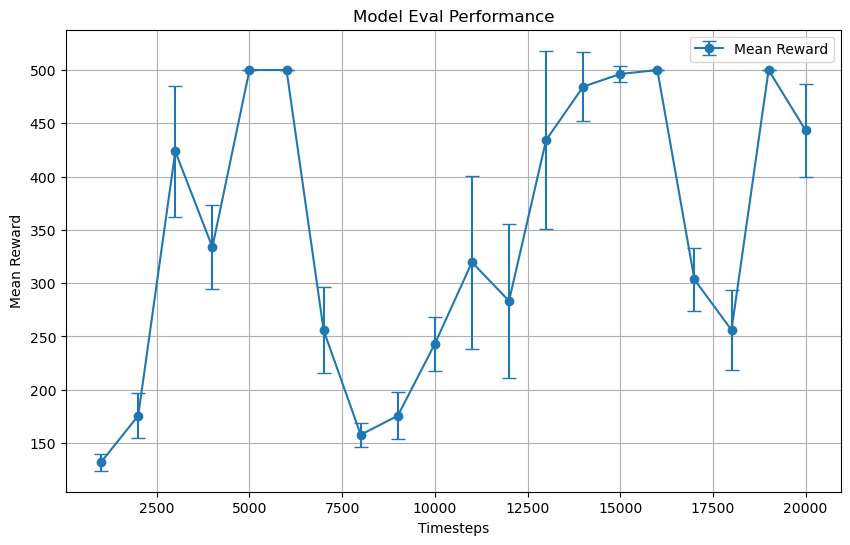

In [49]:
timesteps = [int(checkpoint_file.split("_")[1]) for checkpoint_file in checkpoint_files]


# Plot the results
plt.figure(figsize=(10, 6))
plt.errorbar(timesteps, mean_rewards, yerr=std_rewards, fmt='-o', capsize=5, label="Mean Reward")
plt.xlabel("Timesteps")
plt.ylabel("Mean Reward")
plt.title("Model Eval Performance")
plt.grid(True)
plt.legend()
plt.show()


In [53]:
# graph_path = os.path.join(SAVE_FOLDER, "eval_performance_over_time.png")
# plt.savefig(graph_path, format="png", dpi)
# print(f"Graph saved to {graph_path}")
